## Luke Schwenke
### Machine Learning: Homework 1 - Normal Equation
### April 1, 2023

In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sea

In [76]:
os.getcwd()

'/Users/lmschwenke/Downloads'

In [77]:
os.chdir('/Users/lmschwenke/downloads')

In [78]:
df = pd.read_csv('bottle.csv')

/var/folders/rx/2jqwhb8d31960xlz0g9vlmdh0000gn/T/ipykernel_6689/3912374764.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


# Part A - Data Cleaning & EDA

In [79]:
df.shape

(864863, 74)

In [83]:
df = df[['T_degC', 'Salnty', 'STheta']]

In [84]:
df = df.dropna()

In [85]:
df['T_degC']

0         10.500
1         10.460
2         10.460
3         10.450
4         10.450
           ...  
864858    18.744
864859    18.744
864860    18.692
864861    18.161
864862    17.533
Name: T_degC, Length: 812174, dtype: float64

Text(0.5, 1.0, 'Water Salinity vs. Temp. Scatter plot')

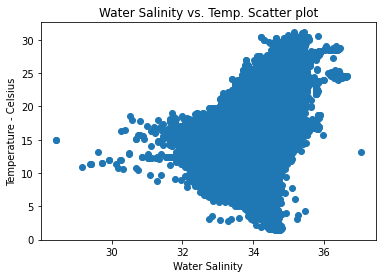

In [86]:
plt.scatter(df['Salnty'], df['T_degC'])

plt.xlabel('Water Salinity')
plt.ylabel('Temperature - Celsius')
plt.title('Water Salinity vs. Temp. Scatter plot')

Text(0.5, 1.0, 'Water Density vs. Temp. Scatter plot')

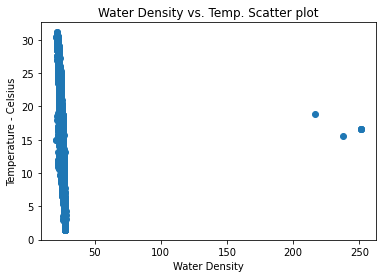

In [87]:
plt.scatter(df['STheta'], df['T_degC'])

plt.xlabel('Water Density')
plt.ylabel('Temperature - Celsius')
plt.title('Water Density vs. Temp. Scatter plot')

Text(0.5, 1.0, 'Distribution of Temperature')

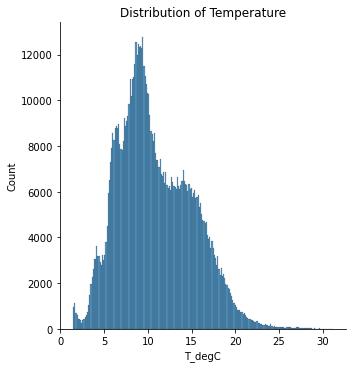

In [93]:
sea.displot(df['T_degC'])
plt.title("Distribution of Temperature")

In [94]:
# Remove Outliers (filter out where water density > 200 )
df = df[df['STheta']<200]
df.shape

(812168, 3)

Text(0.5, 1.0, 'Water Density vs. Temp. Scatter plot (Outliers Removed)')

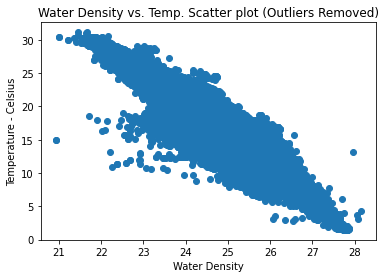

In [95]:
plt.scatter(df['STheta'], df['T_degC'])

plt.xlabel('Water Density')
plt.ylabel('Temperature - Celsius')
plt.title('Water Density vs. Temp. Scatter plot (Outliers Removed)')

The Water Density (STheta) scatter plot becomes a lot clearer and less skewed when we remove the outliers above 200. Most values fall between 21 and 28, so values over 200 were definitely extreme.

# Part B - Train & Test Split

In [97]:
from sklearn.model_selection import train_test_split
import numpy as np

In [122]:
X = df.drop('T_degC', axis=1)
y = df['T_degC']

# Split into X/y Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

# Part C - Linear Regressions Using Normal Question

In [123]:
# Add intercept value of 1
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [124]:
# Build the normal equation using NumPy
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
theta

array([35.71479715,  3.10861813, -5.03801106])

In [125]:
# Make predictions on the test data
y_pred = X_test.dot(theta)
y_pred

array([12.67813757, 14.24881619, 13.2337984 , ...,  7.51978242,
        8.73812298,  9.58491604])

In [126]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Calculate the mean squared error (MSE) of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

# Calculate the explained variance score of the model
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score: ", evs)

Mean Squared Error (MSE):  0.2336312072681096
R-squared score:  0.9868858377368179
Explained Variance Score:  0.9868858868091726


Text(0.5, 1.0, 'Actual vs. Predicted Temperatures (Normal Equation from Scratch - Test Set)')

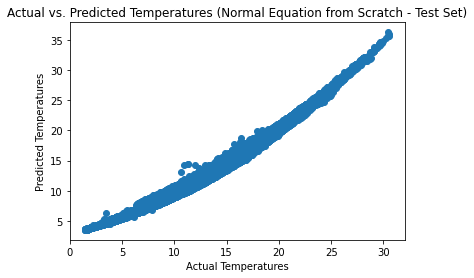

In [127]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures (Normal Equation from Scratch - Test Set)')

# Part D - Sklearn API

In [134]:
from sklearn.linear_model import LinearRegression

# Instance of LinearRegression Class
lin_reg = LinearRegression()

# Fit the model
model = lin_reg.fit(X_train, y_train)

In [133]:
model.coef_

array([ 0.        ,  3.10861813, -5.03801106])

In [132]:
model.intercept_

35.71479714934591

In [136]:
y_preds_test = model.predict(X_test)

In [137]:
y_test #T_degC

841829    12.768
652503    14.490
830267    13.270
619998    12.160
177049     7.440
           ...  
619651    15.860
456668     1.490
531945     7.570
375535     9.140
617486     9.800
Name: T_degC, Length: 162434, dtype: float64

In [138]:
# Calculate the mean squared error (MSE) of the predictions
mse = mean_squared_error(y_test, y_preds_test)
print("Mean Squared Error (MSE): ", mse)

# Calculate the R-squared score of the model
r2 = r2_score(y_test, y_preds_test)
print("R-squared score: ", r2)

# Calculate the explained variance score of the model
evs = explained_variance_score(y_test, y_preds_test)
print("Explained Variance Score: ", evs)

Mean Squared Error (MSE):  0.23363120726805545
R-squared score:  0.986885837736821
Explained Variance Score:  0.9868858868091741


Text(0.5, 1.0, 'Actual vs. Predicted Temperatures (Sklearn - Test Set)')

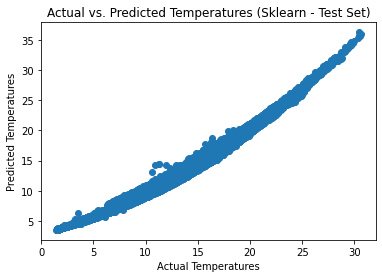

In [139]:
plt.scatter(y_test, y_preds_test)

plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs. Predicted Temperatures (Sklearn - Test Set)')

# Part E - Conceptual Questions

**1. Why is it important to have a test set?**

* Is it important to have a test set so you can evaluate the performance of your training model on unseen data. This tells you if your model is underfitting or overfitting the training data. In other words, is it capturing the patterns in your train set too much and not generalizing well to unseen data (overfit), or is it not capturing enough patterns and performing poorly on both datasets (underfit).

**2. If the normal equation always provides a solution, when would we not want to use it?**

* The normal equation can only be used for linear regression where the target variable is a linear function of the independent variables. It assumes no outliers and a normal distribution, which not all datasets will follow. It can become computationally ineffecient on large datasets.

**3. How might we improve the fit of our models from Part C & D?**

* For Parts C and D, you could include more data in the training set to be able to capture of the patterns in the data. Aside from this you could also scale the features to be on similar ranges like 0 to 1. This prevents one variable having more power over the other purely in relation to how large or small its values are.

**4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff.** 

* Bias refers to how much our predictions differ from the actual values.

* Variance refers to how much the predictions vary as a result of being trained on the data subset.

* In regards to the bias-variance tradeoff, high bias models are usually oversimplified and don't capture the data's underlying patters (underfitting). High variance models are usually overfit and cannot generalize well to unseen data. As model complexitiy increases, bias typically decreases while variance increase. On the other hand, as the complexity of the model decreases, the bias increases but variance decreases. The goal is to balance this.


**5. In a linear regression model, how might we reduce bias?**

* To reduce bias in linear regression you can add more columns (features), use transformations, or perform k-fold cross validation when splitting data into train and test sets.

**6. In a linear regression model, how might we reduce variance?** 

* To reduce variance in linear regression you can trim variables with feature selection, increase the number of records/rows in the dataset, or perform k-fold cross validation when splitting data into train and test sets.